# DSC 198 Soccer GPS Data Exploration

In [1]:
import pandas as pd
import numpy as np
import math
import datetime

from matplotlib import pyplot as plt
import plotly
import os
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../data')

import src.viz

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'/Users/Casey/GitHub/DSC198-PASS-Soccer-Key-Play-Vis-Project/notebooks'

In [13]:
main_folder = '../'
game_folder = '../DSC198-PASS-Soccer-Key-Play-Vis-Project/data/'

games = ['Humbolt', 'Point Loma', 'Pomona', 'Sonoma']

In [14]:
humbolt_games = game_folder + games[0]
pointloma_games = game_folder + games[1]
pomona_games = game_folder + games[2]
sonoma_games = game_folder + games[3]

In [18]:
path = os.getcwd()
print("Current Directory", path)
  
# prints parent directory
pr_path = os.path.abspath(os.path.join(path, os.pardir))
print(os.path.abspath(os.path.join(path, os.pardir)))

Current Directory /Users/Casey/GitHub/DSC198-PASS-Soccer-Key-Play-Vis-Project/notebooks
/Users/Casey/GitHub/DSC198-PASS-Soccer-Key-Play-Vis-Project


In [24]:
os.chdir(pr_path + '/data/Pomona')

In [25]:
os.getcwd()

'/Users/Casey/GitHub/DSC198-PASS-Soccer-Key-Play-Vis-Project/data/Pomona'

In [ ]:
os.chdir()

In [6]:
player_files = os.listdir()
player_files

['WSOC v Point Loma Export for Kelsey Kimball 4348.csv',
 'WSOC v Point Loma Export for Sophia Bruno 4286.csv',
 'WSOC v Point Loma Export for Katelyn Meyer 4821.csv',
 'WSOC v Point Loma Export for Amanda Erickson 3701.csv',
 'WSOC v Point Loma Export for Kameryn Hoban 4269.csv',
 'WSOC v Point Loma Export for Lucy Tang 4564.csv',
 'WSOC v Point Loma Export for Marissa Ray 3495.csv',
 'WSOC v Point Loma Export for Delaney Whittet 4498.csv',
 'WSOC v Point Loma Export for Erika Braun 4796.csv',
 'WSOC v Point Loma Export for Ashlynn Kolarik 4247.csv',
 'WSOC v Point Loma Export for Natalie Widmer 3527.csv',
 'WSOC v Point Loma Export for Mia Bonifazi 3471.csv',
 'WSOC v Point Loma Export for Hana Law 4502.csv',
 'WSOC v Point Loma Export for Michelle Baddour 3966.csv',
 'WSOC v Point Loma Export for Natalie Saddic 5174.csv',
 'WSOC v Point Loma Export for Emily Killeen 4568.csv',
 'WSOC v Point Loma Export for Mikaela Celeste 4386.csv',
 'WSOC v Point Loma Export for Christina Oddone 4

In [7]:
def lat_con(lat):
    #y0 = 32.887444
    #y0 = 32.887423
    y0 = 32.887890643008
    output = ((lat - y0)*100000)
    return output

def long_con(long):
    #x0 = -117.2403311
    x0 = -117.24008563915
    #x0 = -117.240433
    
    output = (long - x0)*100000
    return output

In [8]:
def convert_latitude(lat):
    x = 32.887890643008
    converted = (lat - x) * 100000
    
    return converted

def convert_longitude(long):
    y = -117.24008563915
    converted = (long - y) * 100000
    
    return converted
    
def rotate(point, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "low performance" version since it's recalculating
    the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
    It's more readable than the next function, though.
    """
    x, y = point
    ox, oy = origin

    qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
    qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

    return qx, qy

radian_val = 3.0846278020723585

In [9]:
game_df = pd.DataFrame()

for player_file in player_files:
    curr = pd.read_csv(player_file, skiprows = 8)
    
    name = ' '.join(player_file.split(' ')[-3:-1])
    curr['Player'] = name
    
    curr['Seconds'] = curr['Seconds'].apply(lambda x: int(x))
    curr = curr.groupby('Seconds').tail(1)
    
    game_df = pd.concat([game_df, curr], ignore_index = True)

In [10]:
game_df.head()

Timestamp  Seconds  Velocity  Acceleration  Odometer  \
0  11/23/2019 13:52:38.98        0      0.01     -0.213459      0.00   
1  11/23/2019 13:52:40.07        1      0.11      0.103595      0.40   
2  11/23/2019 13:52:40.97        2      0.05     -0.016380      0.59   
3  11/23/2019 13:52:42.07        3      0.19      0.107396      0.89   
4  11/23/2019 13:52:43.07        4      0.02     -0.270072      0.99   

    Latitude   Longitude  Heart Rate  Player Load  Positional Quality (%)  \
0  32.888020 -117.239759           0          0.0                     0.0   
1  32.888031 -117.239757           0          0.0                    56.5   
2  32.888033 -117.239761           0          0.0                    55.7   
3  32.888033 -117.239763           0          0.1                    58.0   
4  32.888035 -117.239764           0          0.1                    57.9   

   HDOP  #Sats          Player  
0  3.24      4  Kelsey Kimball  
1  2.31      6  Kelsey Kimball  
2  2.31      6  Kelsey Kimball  
3  2.31      6  Kelsey Kimball  
4  2.31      6  Kelsey Kimball

In [11]:
def get_coordinates(lat, long):
    new_lat, new_long = rotate((lat, long), radian_val)
    
    return new_lat, new_long

In [12]:
def get_player_coordinates(df):
    df['Converted Latitude'] = df['Latitude'].apply(convert_latitude)
    df['Converted Longitude'] = df['Longitude'].apply(convert_longitude)
    
    coordinates = df.apply(lambda x: get_coordinates(x['Converted Latitude'],
                                                     x['Converted Longitude']),
                           axis = 1)
    
    return df

In [13]:
coord_df = get_player_coordinates(game_df)
coord_df.head()

Timestamp  Seconds  Velocity  Acceleration  Odometer  \
0  11/23/2019 13:52:38.98        0      0.01     -0.213459      0.00   
1  11/23/2019 13:52:40.07        1      0.11      0.103595      0.40   
2  11/23/2019 13:52:40.97        2      0.05     -0.016380      0.59   
3  11/23/2019 13:52:42.07        3      0.19      0.107396      0.89   
4  11/23/2019 13:52:43.07        4      0.02     -0.270072      0.99   

    Latitude   Longitude  Heart Rate  Player Load  Positional Quality (%)  \
0  32.888020 -117.239759           0          0.0                     0.0   
1  32.888031 -117.239757           0          0.0                    56.5   
2  32.888033 -117.239761           0          0.0                    55.7   
3  32.888033 -117.239763           0          0.1                    58.0   
4  32.888035 -117.239764           0          0.1                    57.9   

   HDOP  #Sats          Player  Converted Latitude  Converted Longitude  
0  3.24      4  Kelsey Kimball           12.905699            32.683915  
1  2.31      6  Kelsey Kimball           14.015699            32.843915  
2  2.31      6  Kelsey Kimball           14.285699            32.463915  
3  2.31      6  Kelsey Kimball           14.215699            32.293915  
4  2.31      6  Kelsey Kimball           14.435699            32.193915

In [14]:
coord_df['Converted Latitude'] = coord_df['Converted Latitude'].apply(lambda x: x + 51.5)
coord_df['Converted Longitude'] = coord_df['Converted Longitude'].apply(lambda x: x + 33)

In [15]:
barebones = coord_df[['Player', 'Seconds', 'Converted Latitude', 'Converted Longitude']]

barebones['Converted Latitude'] = barebones['Converted Latitude'].apply(lambda x: x if (x >= 0) & (x <= 103) else np.nan)
barebones['Converted Longitude'] = barebones['Converted Longitude'].apply(lambda x: x if (x >= 0) & (x <= 66) else np.nan)

barebones.head()

Player  Seconds  Converted Latitude  Converted Longitude
0  Kelsey Kimball        0           64.405699            65.683915
1  Kelsey Kimball        1           65.515699            65.843915
2  Kelsey Kimball        2           65.785699            65.463915
3  Kelsey Kimball        3           65.715699            65.293915
4  Kelsey Kimball        4           65.935699            65.193915

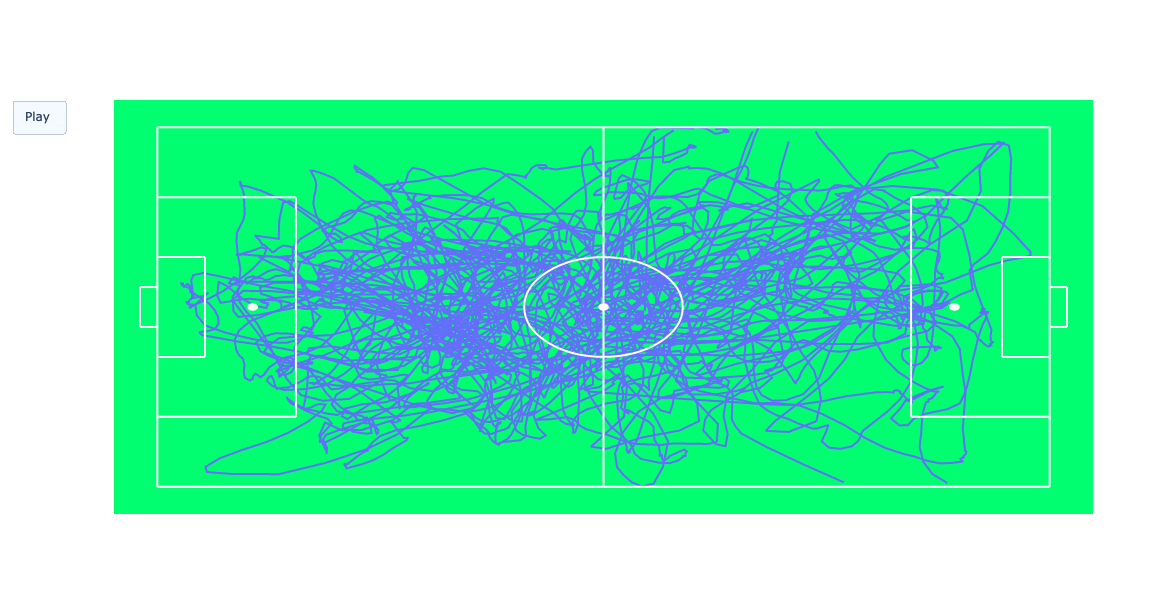

In [26]:
fig = viz.create_empty_field(len_field=103, wid_field=66)
kimball = barebones.loc[barebones['Player'] == 'Kelsey Kimball']

# fig.add_trace(go.Scatter(
#     x = barebones.loc[barebones['Player'] == 'Kelsey Kimball']['Converted Latitude'],
#     y = barebones.loc[barebones['Player'] == 'Kelsey Kimball']['Converted Longitude']
# ))

# fig.layout = ayout=go.Layout(
#         updatemenus=[dict(
#             type="buttons",
#             buttons=[dict(label="Play",
#                           method="animate",
#                           args=[None])])]
#     )

fig.add_trace(go.Scatter(
    x = kimball['Converted Latitude'],
    y = kimball['Converted Longitude']
))

fig.layout['updatemenus'] = [dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]

fig.frames=[go.Frame(
        data=[go.Scatter(
            x=[kimball['Converted Latitude'][k]],
            y=[kimball['Converted Longitude'][k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(kimball['Converted Longitude']))]
    
# sliders_dict = {
#     "active": 0,
#     "yanchor": "top",
#     "xanchor": "left",
#     "currentvalue": {
#         "font": {"size": 20},
#         "prefix": "Second:",
#         "visible": True,
#         "xanchor": "right"
#     },
#     "transition": {"duration": 300, "easing": "cubic-in-out"},
#     "pad": {"b": 10, "t": 50},
#     "len": 0.9,
#     "x": 0.1,
#     "y": 0,
#     "steps": []
# }


# fig["layout"]["sliders"] = [sliders_dict]

# when watching a video we always need to call the figure like this, as validation is extremely slow for videos
plotly.offline.iplot(fig, validate=False, auto_play=False)
# px.scatter(barebones.loc[barebones['Player'] == 'Kelsey Kimball'], x = 'Converted Latitude', y = 'Converted Longitude')

In [ ]:
 frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]

In [82]:
lat_df = game_df.pivot(index = 'Seconds', columns = 'Player', values = 'Converted Latitude')
long_df = game_df.pivot(index = 'Seconds', columns = 'Player', values = 'Converted Longitude')


current = long_df.shape[1] - 1

for i in np.arange(lat_df.shape[1], 0, -2):
    idx = int(i)
    
    lat_df.insert(loc = idx,
                  column = long_df.iloc[:, current].name + " Longitude",
                  value = long_df.iloc[:, current])
    
    current -= 1

In [58]:
game_df.shape

(160483, 15)

In [32]:
# px.scatter(game_df[:10], x = 'Converted Latitude', y = 'Converted Longitude', animation_frame = 'Seconds')

In [37]:
# seconds = np.arange(0, 7642)

# players = game_df['Player'].unique()

# #make figure
# fig_dict = {
#     "data": [],
#     "layout": {},
#     "frames": []
# }

# fig_dict["layout"]["xaxis"] = {"range": [-51.5, 51.5]}
# fig_dict["layout"]["yaxis"] = {"range": [-33, 33]}
# fig_dict["layout"]["hovermode"] = "closest"
# fig_dict["layout"]["updatemenus"] = [
#     {
#         "buttons": [
#             {
#                 "args": [None, {"frame": {"duration": 500, "redraw": False},
#                                 "fromcurrent": True, "transition": {"duration": 300,
#                                                                     "easing": "quadratic-in-out"}}],
#                 "label": "Play",
#                 "method": "animate"
#             },
#             {
#                 "args": [[None], {"frame": {"duration": 0, "redraw": False},
#                                   "mode": "immediate",
#                                   "transition": {"duration": 0}}],
#                 "label": "Pause",
#                 "method": "animate"
#             }
#         ],
#         "direction": "left",
#         "pad": {"r": 10, "t": 87},
#         "showactive": False,
#         "type": "buttons",
#         "x": 0.1,
#         "xanchor": "right",
#         "y": 0,
#         "yanchor": "top"
#     }
# ]
    
# sliders_dict = {
#     "active": 0,
#     "yanchor": "top",
#     "xanchor": "left",
#     "currentvalue": {
#         "font": {"size": 20},
#         "prefix": "Seconds:",
#         "visible": True,
#         "xanchor": "right"
#     },
#     "transition": {"duration": 300, "easing": "cubic-in-out"},
#     "pad": {"b": 10, "t": 50},
#     "len": 0.9,
#     "x": 0.1,
#     "y": 0,
#     "steps": []
# }
    
# data_dict = {
#     "x": list(game_df["Converted Latitude"]),
#     "y": list(game_df["Converted Longitude"]),
#     "mode": "markers",
#     "text": list(game_df["Player"]),
#     "name": players
# }
# fig_dict["data"].append(data_dict)
    
# #make frames
# for second in seconds:
#     frame = {"data": [], "name": str(second)}
    
#     for player in players:
#         player_by_sec = game_df[(game_df['Seconds'] == int(second)) &
#                                (game_df['Player'] == player)]
    
#         data_dict = {
#             "x": list(player_by_sec["Latitude"]),
#             "y": list(player_by_sec["Longitude"]),
#             "mode": "markers",
#             "text": list(player_by_sec["Player"]),
#             "name": player
#         }
#         frame["data"].append(data_dict)
    
#     fig_dict["frames"].append(frame)
    
#     slider_step = {"args": [
#         [second],
#         {"frame": {"duration": 300, "redraw": False},
#          "mode": "immediate",
#          "transition": {"duration": 300}}
#     ],
#         "label": second,
#         "method": "animate"}
#     sliders_dict["steps"].append(slider_step)

# fig_dict["layout"]["sliders"] = [sliders_dict]

# fig = go.Figure(fig_dict)

# fig.show()